#Lesson 11.2.3 Activity

Right now, we are using a feature-engineered variable that is (more or less) an average of the parents' heights. Sir Francis Galton made the choice to model the data this way because, when he first analyzed it, multiple linear regression hadn't been developed yet!

However, we now have the tools to model the data using each parent's height separately. Adding an additional feature to our model (using Father and Mother rather than MidParent) might allow us to improve our model predictions. Or it might send us back into the territory of overfitting.

Let's see what happens!



#Step 1: Download and save the `heights.csv` dataset from the class materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the heights.csv dataset 

* When prompted, navigate to and select the `heights.csv` dataset where you saved it on your computer.
* This is a pretty large dataset, so it may take a little while.

In [ ]:
#Step 2

from google.colab import files
heights = files.upload()

Saving heights.csv to heights.csv


In [ ]:
#Step 3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Step 4: Create a Pandas DataFrame from the CSV file
* Name the DataFrame `heights`.
* Print the first five observations of `heights`.  Note the kinds of data it contains.

In [ ]:
#Step 4
heights = pd.read_csv('heights.csv')

heights.head()

,Family,Father,Mother,Gender,Height,Kids,MidParent
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


#Step 5: Split the data into the target variable and the feature of interest.





In [ ]:
#Step 5
X = heights[['Father', 'Mother', 'Gender']]
y = heights[['Height']]

print(X)


     Father  Mother Gender
0      78.5    67.0      M
1      78.5    67.0      F
2      78.5    67.0      F
3      78.5    67.0      F
4      75.5    66.5      M
..      ...     ...    ...
893    68.5    65.0      M
894    68.5    65.0      M
895    68.5    65.0      F
896    68.5    65.0      F
897    68.5    65.0      F

[898 rows x 3 columns]


#Step 6: One-hot encode `Gender` 






In [ ]:
#Step 6
one_hot = pd.get_dummies(data = X, columns = ['Gender'])
X = pd.DataFrame(one_hot)
X.head()

,Father,Mother,Gender_F,Gender_M
0,78.5,67.0,0,1
1,78.5,67.0,1,0
2,78.5,67.0,1,0
3,78.5,67.0,1,0
4,75.5,66.5,0,1


#Step 7: Split the data into a training/validation dataset and a test dataset






In [ ]:
#Step 7
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train_val.shape)
X_test.shape

(673, 4)


(225, 4)

#Step 8: Split the training/validation dataset into a training set and validation set






In [ ]:
#Step 8
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3333, random_state=42) 
print(X_train.shape)
X_val.shape

(448, 4)


(225, 4)

#Step 9: Fit a linear regression model using sklearn








In [ ]:
#Step 9

reg = LinearRegression()

model = reg.fit(X_train, y_train)


              

#Step 10: Calculate the predicted y values for the training set and validation set using your regression model


```






In [ ]:

#Step 10
y_pred = model.predict(X_train)

y_pred_val = model.predict(X_val)


#Step 11: Calculate and interpret the RMSE and R-squared for the model using the training data





In [ ]:

#Step 11
RMSE_train = MSE(y_train, y_pred, squared = False)
print(RMSE_train)

r2_train = r2_score(y_train, y_pred)
print(r2_train)

2.176113272827663
0.6390857198371703


#Step 12: Calculate and interpret the RMSE and R-squared for the model using the valdication data





In [ ]:

#Step 12
RMSE_val = MSE(y_val, y_pred_val, squared = False)
print(RMSE_val)

r2_val = r2_score(y_val, y_pred_val)
print(r2_val)

2.0693705905203346
0.6683120474277823


In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
#Step 12
RMSE_test = MSE(y_test, y_pred_test, squared = False)
print(RMSE_test)

r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

2.1970153239162586
0.5998837209859202


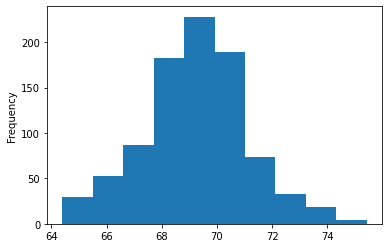

In [ ]:
heights['MidParent'].plot.hist()